# Учебный проект на тему "Прогноз диабета — логистическая регрессия"

## Что такое диабет?

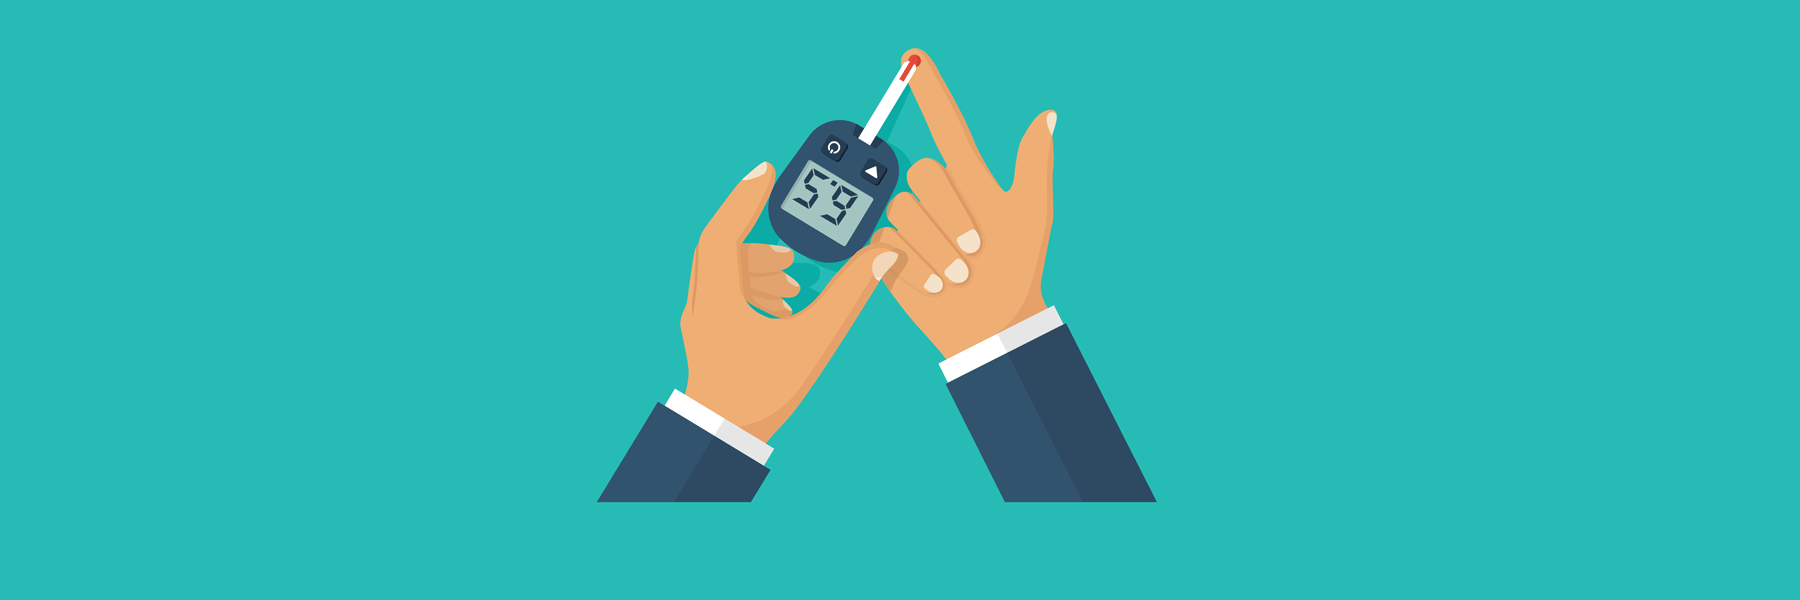

**Диабет** — это хроническое заболевание, которое возникает, когда поджелудочная железа больше не способна вырабатывать инсулин или когда организм не может эффективно использовать вырабатываемый им инсулин.

**Инсулин** — это гормон, вырабатываемый поджелудочной железой, который действует как ключ, позволяющий глюкозе из пищи, которую мы едим, проходить из кровотока в клетки организма для производства энергии. Все углеводные продукты расщепляются в крови до глюкозы. Инсулин помогает глюкозе проникнуть в клетки.

Неспособность производить инсулин или эффективно его использовать приводит к повышению уровня глюкозы в крови (известному как гипергликемия). Длительный высокий уровень глюкозы связан с повреждением организма и отказом различных органов и тканей.

## Загрузка данных

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

In [2]:
data = pd.read_csv(r"diabetes2.csv")
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


* **Pregnancies** - количество беременностей;
* **Glucose** - уровень глюкозы в крови;
* **BloodPressure** - артериальное давление;
* **SkinThickness** - толщина кожи;
* **Insulin** - уровень инсулина;
* **BMI** - индекс массы тела;
* **DiabetesPedigreeFunction** - рассчитывает вероятность диабета в зависимости от возраста субъекта и его/ее семейного анамнеза диабета;
* **Age** - возраст;
* **Outcome** - если 1 - у пациента диабет, если 0 - у пациента нет диабета.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Как видно, пропущенных значений в датасете не имеется.

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## Визуализация

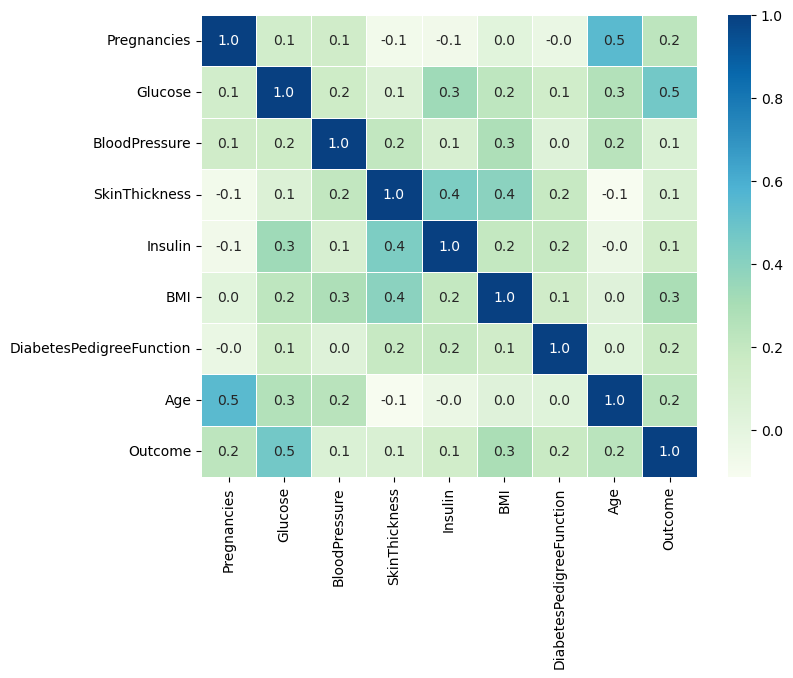

In [8]:
f,ax = plt.subplots(figsize=(8,6))
sns.heatmap(data.corr(), cmap="GnBu", annot=True, linewidths=0.5, fmt= '.1f',ax=ax)
plt.show()

Здесь изображена тепловая карта корреляционной матрицы. Чем выше коэффициент корреляции между случайными величинами, тем сильнее друг от друга они зависят.

In [10]:
# Распределение возраста
fig = px.histogram(data, x="Age",
                   marginal="box",
                  )
fig.show()

C:\Users\max_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



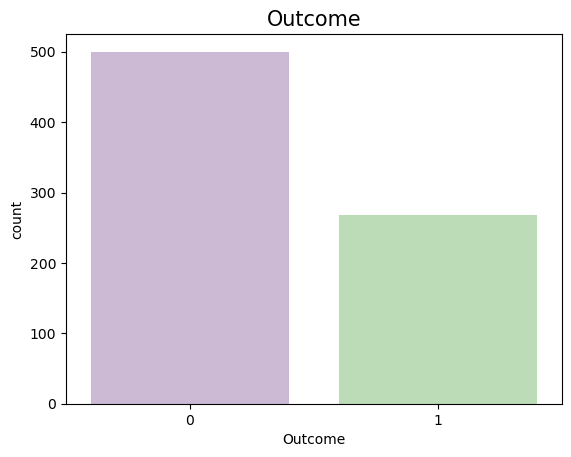

In [11]:
sns.countplot(data.Outcome, palette="PRGn")
plt.title("Outcome",fontsize=15)
plt.show()

Видим, что количество здоровых пациентов почти вдвое больше, чем пациентов с диабетом.

In [12]:
# Распределение возраста здоровых пациентов (Outcome=0)
fig = px.histogram(data, x=data[data.Outcome==0].Age,
                   marginal="box",
                   color_discrete_sequence=['lightgreen']
                  )
fig.show()

In [13]:
# Распределение возраста пациентов с диабетом
fig = px.histogram(data, x=data[data.Outcome==1].Age,
                   marginal="box",
                   color_discrete_sequence=['pink']
                  )
fig.show()

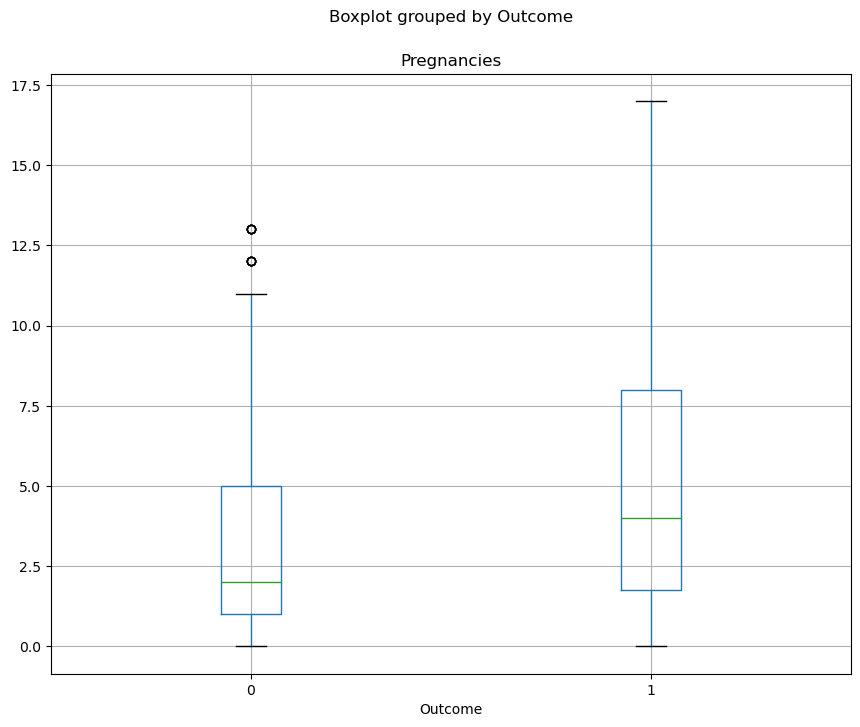

In [15]:
data.boxplot(figsize=(10,8),column='Pregnancies', by ='Outcome')
plt.show()

Здесь представлена визуализация распределения количества абортов у здоровых пациентов и пациентов с диабетом.

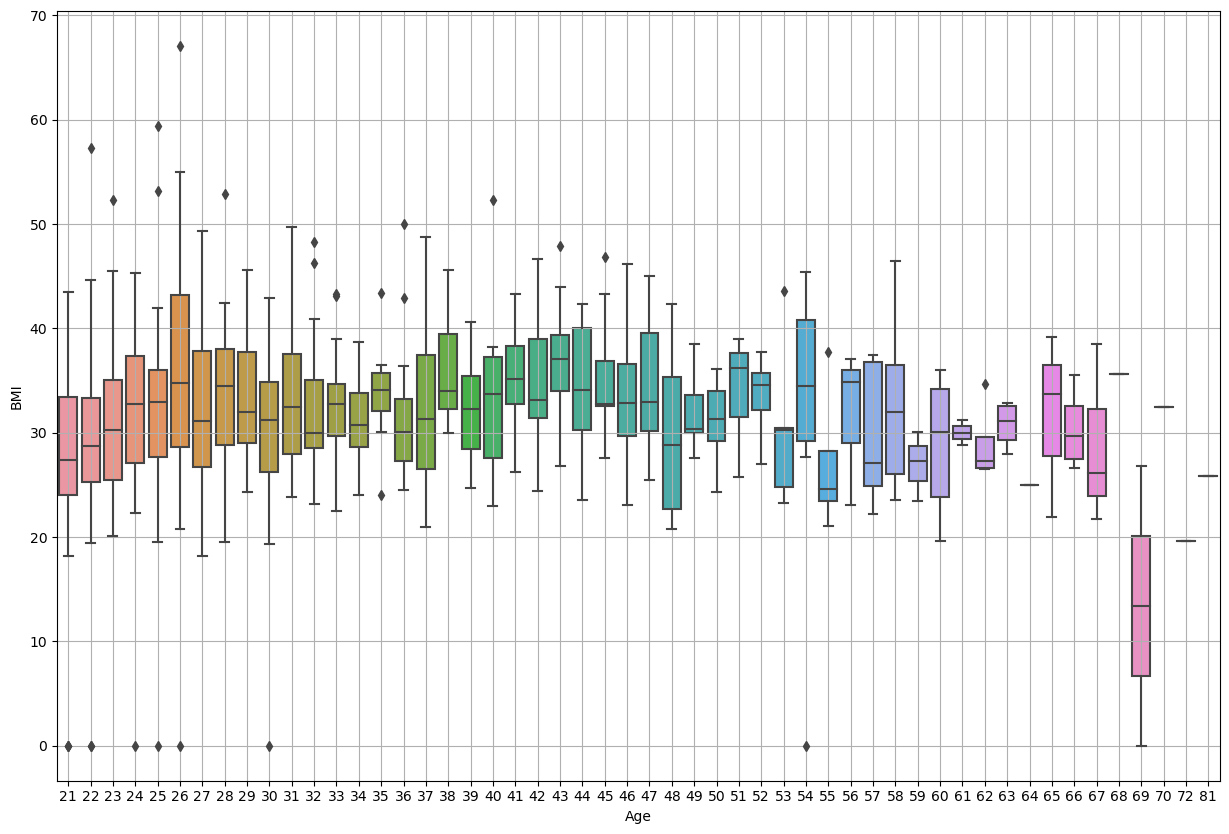

In [26]:
plt.subplots(figsize=(15,10))
sns.boxplot(x='Age', y='BMI', data=data)
plt.grid()
plt.show()

Здесь представлена визуализация распределения индекса массы тела в зависимости от возраста пациентов.

## Логистическая регрессия

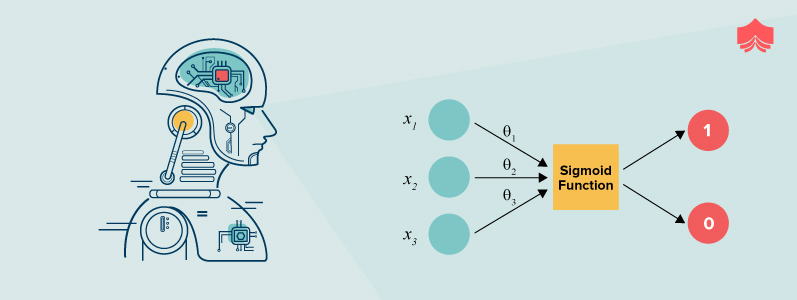

**Логистическая регрессия** — это подходящий регрессионный анализ, который следует проводить, когда зависимая переменная является дихотомической (бинарной). Как и все регрессионные анализы, логистическая регрессия представляет собой прогнозный анализ. Логистическая регрессия используется для описания данных и для объяснения взаимосвязи между одной зависимой двоичной переменной и одной или несколькими независимыми переменными номинального, порядкового, интервального или отношения уровня.

## Прогнозирование диабета с использованием логистической регрессии

Создадим датафрейм x для хранения независимых переменных и датафрейм y для хранения зависимых переменных.

In [33]:
x = data.drop(['Outcome'], axis = 1)
y = data.loc[:,"Outcome"].values

Разобьем выборку x на тренировочную и тестовую, где объём тестовой выборки составит 33%.

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 123)

In [41]:
# Создаём модель логистической регрессии
from sklearn import linear_model
logreg = linear_model.LogisticRegression(max_iter=150)

In [42]:
# Обучаем модель логистической регрессии
logreg.fit(x_train,y_train)

LogisticRegression(max_iter=150)

In [43]:
# Предсказываем значение целевой переменной (Outcome)
predicted = logreg.predict(x_test)

In [48]:
print("Значение метрики accuracy на тестовой выборке: {} ".format(logreg.score(x_test, y_test)))

Значение метрики accuracy на тестовой выборке: 0.7913385826771654 


Теперь выведем матрицу ошибок.

In [50]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predicted)
cf_matrix

array([[139,  18],
       [ 35,  62]], dtype=int64)

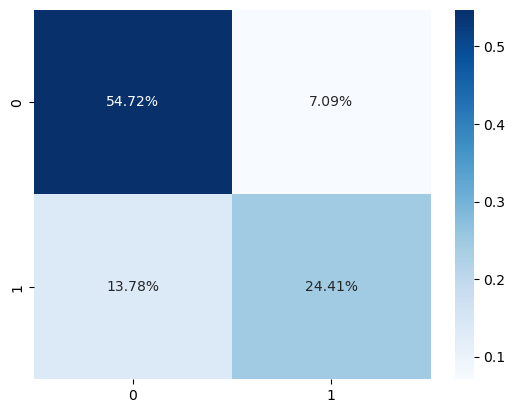

In [53]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()